# extract $m_A$ from run-1 data On-Off beam with $Q^2$-dependent correction

In [2]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0, '../mupClassification/');  sys.path.insert(0, '../off_beam_on_beam_5e19/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.504451038576 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


In [235]:
Evbins = np.linspace(0.1,1.5,10)
Q2bins = np.linspace(0,0.8,10)

In [236]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/mA_extraction/'

In [237]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


In [238]:
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,no cut,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
non-collinearity first,90.4%,45.3%,94.8%,15.4%,"$|\theta_{1,2}-90^0|<60^0$",90.4% (3446),42.7% (1707),10.9% (2462),94.8% (1170)
PIDa,79.9%,45.6%,76.1%,14.0%,${PID}_a>12$,79.9% (3046),38.4% (1536),9.3% (2102),76.1% (939)
length,64.0%,59.4%,63.9%,19.2%,$l_{\mu}>l_{p}$,64.0% (2440),20.3% (812),3.8% (855),63.9% (789)
non-collinearity,58.5%,70.8%,61.4%,24.0%,"$|\theta_{1,2}-90^0|<60^0$",58.5% (2231),14.2% (570),1.6% (351),61.4% (758)
vertex activity,34.2%,78.3%,53.2%,39.4%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",34.2% (1306),5.9% (235),0.6% (127),53.2% (657)
delta phi,24.1%,87.7%,47.9%,56.3%,$|\Delta \phi - \pi|<40^0$,24.1% (921),2.1% (85),0.2% (44),47.9% (591)
theta_pq,17.5%,95.4%,39.4%,69.4%,$\theta_{pq}<25^0$,17.5% (668),0.8% (32),0.0% (0),39.4% (486)
Pt no Delta phi,24.7%,88.7%,46.1%,53.6%,$p_{t}<0.35$ GeV/c,24.7% (941),2.5% (99),0.1% (21),46.1% (569)
soft Pt,20.2%,94.6%,42.9%,65.1%,$p_{t}<0.35$ GeV/c,20.2% (769),1.1% (43),0.0% (1),42.9% (529)


# a demonstration of how to calculated purity and effiency for a given cut as a function of $Q^2$

In [239]:
def get_pur_eff_Q2_for_cut(bins = Q2bins,cut_name = 'PIDa'):

    mup_original = reduced_MCbnbDATAcosmicSamples['no cut']['1mu-1p']
    Q2_pairs_original = mup_original['reco_Q2']
    h_mup_original,bins = np.histogram( Q2_pairs_original , bins=bins )
    h_mup_original = np.array([np.max([h_mup_original[i],1]) for i in range(len(h_mup_original))])
        
    h = dict()
    for pair_type,label,color in zip(pair_types,MClabels,MCcolors):
        pairs = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]
        Q2_pairs = pairs['reco_Q2']
        histo,bins = np.histogram( Q2_pairs , bins=bins )
        histo = np.array([np.max([histo[i],1]) for i in range(len(histo))])
        h[pair_type] = (np.array(histo)).astype(np.float)
        
    
    eff_mup = h['1mu-1p']/h_mup_original
    eff_mup = np.array([np.max([0.01,eff_mup[i]]) for i in range(len(eff_mup))])
    eff_mup_err = eff_mup*np.sqrt( 1./h['1mu-1p'] + 1./h_mup_original )
    
    pur_mup = h['1mu-1p']/(h['1mu-1p'] + h['other pairs'] + h['cosmic'])
    pur_mup = np.array([np.max([0.001,pur_mup[i]]) for i in range(len(pur_mup))])
    pur_mup_err = pur_mup*np.sqrt( 1./h['1mu-1p'] + 1./(h['1mu-1p'] + h['other pairs'] + h['cosmic']) )
    
    return eff_mup , eff_mup_err , pur_mup , pur_mup_err

In [240]:
cuts = ['no cut','vertex activity','soft Pt'] 
cuts_labels = ['no cuts',r'detector cuts',r'kinematical cuts']
eff_mup = dict()
eff_mup_err = dict()
pur_mup = dict()
pur_mup_err = dict()
pur_over_eff_mup = dict()
pur_over_eff_mup_err = dict()

for cut_name in cuts:    
    eff, eff_err, pur, pur_err = get_pur_eff_Q2_for_cut(bins=Q2bins,cut_name=cut_name)
    eff_mup[cut_name] = eff
    eff_mup_err[cut_name] = eff_err
    pur_mup[cut_name] = pur
    pur_mup_err[cut_name] = pur_err
    pur_over_eff_mup[cut_name] = pur/eff
    pur_over_eff_mup_err[cut_name] = pur_over_eff_mup[cut_name]*np.sqrt( np.square(eff_err/eff) + np.square(pur_err/pur) )

## (1) Off-Beam from two samples
the infamous "inconsistent process history" issue
separate the list into two lists 
corresponding to files that were swizzled using v04_26_04_% and v05_08_00_%

In [241]:
OffBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v04_vertices.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v05_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print len(OffBeam),'pairs from Off-Beam'
print len(OffBeamFV),'pairs from Off-Beam in FV'

104447 pairs from Off-Beam
64134 pairs from Off-Beam in FV


## (2) On-Beam sample

In [242]:
OnBeam = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_bnb_v8_mcc8_vertices.csv')
OnBeamFV = sample_in_FV(OnBeam)
print len(OnBeam),'pairs from On-Beam'
print len(OnBeamFV),'pairs from On-Beam in FV'

162057 pairs from On-Beam
100379 pairs from On-Beam in FV


In [243]:
hTmp,bins = np.histogram( OnBeamFV['reco_Ev'] , bins=Evbins )
Ev_centres = (bins[:-1] + bins[1:])/2

hTmp,bins = np.histogram( OnBeamFV['reco_Q2'] , bins=Q2bins )
Q2_centres = (bins[:-1] + bins[1:])/2
Q2_centres

array([ 0.04444444,  0.13333333,  0.22222222,  0.31111111,  0.4       ,
        0.48888889,  0.57777778,  0.66666667,  0.75555556])

In [244]:
reduced_OffBeam = dict()
reduced_OnBeam = dict()

reduced_OffBeam['no cut'] = OffBeamFV
reduced_OnBeam['no cut'] = OnBeamFV

# cut 1: PIDa
PIDaCut = 12
sam = reduced_OffBeam['no cut']
reduced_OffBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]
sam = reduced_OnBeam['no cut']
reduced_OnBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]


# cut 2: require that the longer track is the one with larger PIDa
sam = reduced_OffBeam['PIDa']
reduced_OffBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]
sam = reduced_OnBeam['PIDa']
reduced_OnBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]


# cut 3: |\theta_{1,2}-90^0|<60^0$
theta_12_cut = 60
sam = reduced_OffBeam['length']
reduced_OffBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]
sam = reduced_OnBeam['length']
reduced_OnBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]


# cut 4: vertex activity
opt_box=(50,100)
box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
Ru = 'RdQaroundVertex[plane 0]'+box_str
Rv = 'RdQaroundVertex[plane 1]'+box_str
Ry = 'RdQaroundVertex[plane 2]'+box_str    
reduced_MCbnbDATAcosmic = dict()
r_max_RdQ_CC1p0pi = 0.33
sam = reduced_OffBeam['non-collinearity']
reduced_OffBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]
sam = reduced_OnBeam['non-collinearity']
reduced_OnBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]


# cut 5: \Delta \phi
delta_Delta_phi = 40
sam = reduced_OffBeam['vertex activity']
reduced_OffBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
sam = reduced_OnBeam['vertex activity']
reduced_OnBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]


# modified cut 6: $p_{t}<0.35$
Pt_max = 0.35
sam = reduced_OffBeam['delta phi']
reduced_OffBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]
sam = reduced_OnBeam['delta phi']
reduced_OnBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]

In [245]:
M = 0.939 # GeV
m = 0.1056 # GeV
m_W = 80.42 # GeV # +/- 0.06
g_A = 1.267 # +/- 0.004
cos_theta_C = 0.9755 # +/- 0.004
G_F = 1.1663787 # GeV**-2 # +/- 0.0000006
mu_p = 2.7928474 # proton dipole moment
mu_n = -1.913 # neutron dipole moment
M2 = M * M
m2 = m * m

def tau( Q2 = 0.0 ):
    return (Q2 / (4.*M2))

def G_d( Q2 = 0.0 , Lambda2 = 0.71 ):    
    return np.power((1. + Q2/Lambda2),-2)

def G_A_dipole( Q2 = 0.0 , mA=1.0):  
    '''
    Here mA is coming to play as the axial mass of the dipole form-factor
    '''
    return np.power((1. + Q2/np.square(mA)),-2)

def G_E_n_Bradford( Q2 = 0.0 ):
    
    a = np.array([0 , 1.25 , 1.30 ])
    a_err = np.array([0 , 0.368 , 1.99 ])
    
    b = np.array([ 0 , -9.86 , 305 , -758 , 802])
    b_err = np.array([ 0 , 6.46 , 28.6 , 77.5 , 156])

    numerator = a[0]*(np.power(tau(Q2),0)) + a[1]*(np.power(tau(Q2),1)) + a[2]*(np.power(tau(Q2),2))
    denominator = 1.0 + b[1]*(np.power(tau(Q2),1)) + b[2]*(np.power(tau(Q2),2)) + b[3]*(np.power(tau(Q2),3)) + b[4]*(np.power(tau(Q2),4))


    return (numerator/denominator)

def G_E_p_Bradford( Q2 = 0.0 ):
    
    a = np.array([1. , -0.0578 ])
    a_err = np.array([0 , 0.166 ])
    
    b = np.array([ 0 , 11.1 , 13.6 , 33.0])
    b_err = np.array([ 0 , 0.217 , 1.39 , 8.95])

    numerator = a[0]*(np.power(tau(Q2),0)) + a[1]*(np.power(tau(Q2),1))
    denominator = 1.0 + b[1]*(np.power(tau(Q2),1)) + b[2]*(np.power(tau(Q2),2)) + b[3]*(np.power(tau(Q2),3))

    return (numerator/denominator)

def G_E_Bradford( Q2 = 0.0 ):
    return 0.5*( G_E_p_Bradford(Q2) - G_E_n_Bradford(Q2) )

def G_M_n_Bradford( Q2 = 0.0 ):

    # Bradford gives G_M_n/mu_n in their paper
    a = np.array([ 1 , 1.81 ])
    a_err = np.array([ 0 , 0.402 ])
    
    b = np.array([ 0 , 14.1 , 20.7 , 68.7])
    b_err = np.array([ 0 , 0.597 , 2.55 , 14.1])

    numerator = a[0]*(np.power(tau(Q2),0)) + a[1]*(np.power(tau(Q2),1))
    denominator = 1.0 + b[1]*(np.power(tau(Q2),1)) + b[2]*(np.power(tau(Q2),2)) + b[3]*(np.power(tau(Q2),3))

    return mu_n*(numerator/denominator)

def G_M_p_Bradford( Q2 = 0.0 ):
    a = np.array([ 1 , 0.150 ])
    a_err = np.array([ 0 , 0.0312 ])
    
    b = np.array([ 0 , 11.1 , 19.6 , 7.54])
    b_err = np.array([ 0 , 0.103 , 0.281 , 0.967])

    numerator = a[0]*(np.power(tau(Q2),0)) + a[1]*(np.power(tau(Q2),1))
    denominator = 1.0 + b[1]*(np.power(tau(Q2),1)) + b[2]*(np.power(tau(Q2),2)) + b[3]*(np.power(tau(Q2),3))

    return mu_p*(numerator/denominator)

def G_M_Bradford( Q2 = 0.0 ):
    return 0.5*( G_M_p_Bradford(Q2) - G_M_n_Bradford(Q2) )

def F1_p_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( tau(Q2)*G_M_p_Bradford(Q2) + G_E_p_Bradford(Q2) )
def F2_p_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( G_M_p_Bradford(Q2) - G_E_p_Bradford(Q2) )
def F1_n_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( tau(Q2)*G_M_n_Bradford(Q2) + G_E_n_Bradford(Q2) )
def F2_n_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( G_M_n_Bradford(Q2) - G_E_n_Bradford(Q2) )


def F1V_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( tau(Q2)*G_M_Bradford(Q2) + G_E_Bradford(Q2) )
def F2V_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( G_M_Bradford(Q2) - G_E_Bradford(Q2) )

def G_E_p_Bernauer( Q2 = 0.0 ):
    a = np.array([ 1.0 , -3.3686, 14.5606 , -88.1912 
                  , 453.6244 , -1638.7911 , 3980.7174 
                  , -6312.6333 , 6222.3646 , -3443.2251 
                  , 814.4112 ])
    Q2_powers = np.array([np.power(Q2,n) for n in range(len(a))])
    return  a[0]*(Q2**0) + a[1]*np.power(Q2,1) + a[2]*np.power(Q2,2) + a[3]*np.power(Q2,3) + a[4]*np.power(Q2,4) + a[5]*np.power(Q2,5)
def G_M_p_Bernauer( Q2 = 0.0 ):
    a = np.array([1.0 ,-2.5952 , 1.0222 , 23.4945, -93.0372
                  ,140.7984, -0.3656 , -305.6759 , 444.6251 
                  , -273.6688 , 64.5811 ])
    a = np.array([ 1.0 ,-2.5952])
    return  a[0]*(Q2**0) + a[1]*np.power(Q2,1) + a[2]*np.power(Q2,2) + a[3]*np.power(Q2,3)
    Q2_powers = np.array([np.power(Q2,n) for n in range(len(a))])

In [246]:
G_F2 = G_F * G_F
cos2_theta_C = cos_theta_C*cos_theta_C
m_W2 = m_W * m_W

# Kinematical Factor
def KinFactor( E=0 , Q2=0.0):
    F = (M2*G_F2*cos2_theta_C)/(8*np.pi)
    #     return ( F/np.square(E) ) * np.square( m_W2/(m_W2+Q2) )  # F is just a Fermi-factor, independent for the experiment
    return ( 1./np.square(E) ) * np.square( m_W2/(m_W2+Q2) ) 


# ξ
def xi( E=0 , Q2=0.0 ):
    return ( (4*M*E - Q2 - m2)/(M2))


# A
def A( Q2=0.0 , mA=1.0 ):
    t = tau(Q2)
    G_A = G_A_dipole(Q2=Q2,mA=mA)
    G_E_V = G_E_Bradford(Q2)
    G_M_V = G_M_Bradford(Q2)
    #     I = np.ones(len(t))    
    return (4.*t*( (1+t)*np.square(G_A) - 4*np.square(G_E_V) + 4*t*np.square(G_M_V) ))
# The last two terms in A are usually discarded in experimental analyses as they are suppressed by powers of (m/M)2 ∼ 1% 


# B
def B( Q2=0.0 , mA=1.0 ):
    t = tau(Q2)
    G_A = G_A_dipole(Q2=Q2,mA=mA)
    G_M_V = G_M_Bradford(Q2)
    return (8 * t * G_A * G_M_V)


# C
def C( Q2=0.0 , mA=1.0 ):
    t = tau(Q2)
    G_A = G_A_dipole(Q2=Q2,mA=mA)
    F_1_V = F1V_Bradford(Q2)
    F_2_V = F2V_Bradford(Q2)
    return ( 0.25*np.square(G_A) + np.square(F_1_V) + t*np.square(F_2_V) )

def CCelasticXsec( Q2 , Ev, mA ):
    return (KinFactor(Ev , Q2) * ( A(Q2,mA) + xi(Ev,Q2)*B(Q2,mA) + np.square(xi(Ev,Q2))*C(Q2,mA) ))

def N_CCelasticXsec( Q2 , Ev, mA , NormFact ):
    # normalization factor for the data mutiplies the CCelastic Xsec
    return (NormFact*KinFactor(Ev , Q2) * ( A(Q2,mA) + xi(Ev,Q2)*B(Q2,mA) + np.square(xi(Ev,Q2))*C(Q2,mA) ))

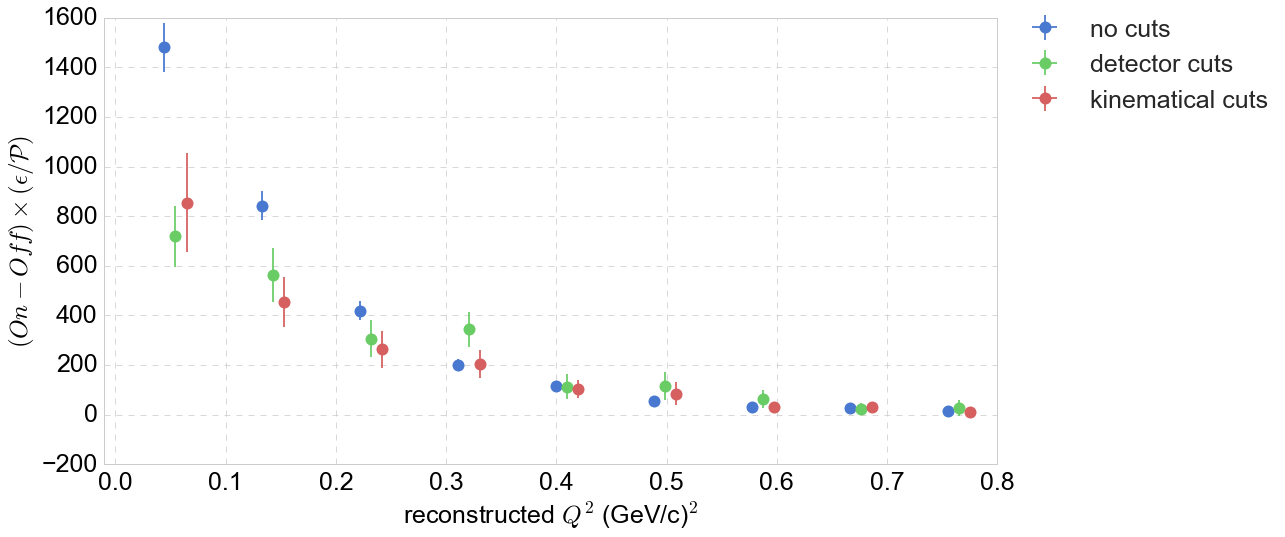

In [255]:
h_OnOff_corrected = dict()
h_OnOff_corrected_err = dict()
h_OnOff_measured = dict()
h_OnOff_measured_err = dict()

cuts = ['no cut' ,'vertex activity','soft Pt'] #
cut_labels = ['no cuts','detector cuts','kinematical cuts']
for cut_name in cuts:
    
    OnBeamSample = reduced_OnBeam[cut_name]
    OffBeamSample = reduced_OffBeam[cut_name]
    
    h_OnBeam,edges = np.histogram( OnBeamSample['reco_Q2'] , bins=Q2bins )
    h_OnBeam_err = np.sqrt(h_OnBeam)
    h_OffBeam,edges = np.histogram( OffBeamSample['reco_Q2'] , bins=Q2bins )
    h_OffBeam_err = np.sqrt(h_OffBeam)
    
    h_OnBeam_minus_OffBeam = h_OnBeam - OffBeam_scaling*h_OffBeam
    h_OnBeam_minus_OffBeam_err = np.sqrt( np.abs(h_OnBeam + OffBeam_scaling*OffBeam_scaling*h_OffBeam) )

    h_OnOff_measured[cut_name] = h_OnBeam_minus_OffBeam
    h_OnOff_measured_err[cut_name] = h_OnBeam_minus_OffBeam_err

    h_OnOff_corrected[cut_name] = h_OnBeam_minus_OffBeam*pur_over_eff_mup[cut_name]
    h_OnOff_corrected_err[cut_name] = np.sqrt( np.square(h_OnBeam_minus_OffBeam_err*pur_over_eff_mup[cut_name]) 
                                              + np.square(h_OnBeam_minus_OffBeam*pur_over_eff_mup_err[cut_name]) )
    
fig,ax = plt.subplots(figsize=(16,8))
for i_cut,(cut_name,cut_label) in enumerate(zip(cuts                             
                                                ,['no cuts','detector cuts','kinematical cuts'])):
    plt.errorbar( x = Q2_centres+0.01*i_cut, xerr=0, markersize=12
                 , y=h_OnOff_corrected[cut_name] , yerr=h_OnOff_corrected_err[cut_name]
                 , fmt='o', label=cut_label)
ax.legend(bbox_to_anchor=(1,1.05),fontsize=25,loc=2)        
set_axes(ax,r'reconstructed $Q^2$ (GeV/c)$^2$',r'$(On-Off) \times (\epsilon / \mathcal{P}) $'
         ,xlim=(-0.01,0.8)
#          ,ylim=(-1,1200)
         ,do_add_grid=True)
# plt.savefig(figures_path+'Q2corrected_mup.pdf',bbox_inches='tight')

# We extract the $m_A$ as follows: 
1. calculate the $chi^2$ for a given $m_A$ and normalization factor $C$ to fit the data, binned in $Q^2$:
    1. for each bin in $Q^2$, count the number of events in the On-Off data, as $N_{On-Off}\times\frac{\mathcal{P}}{\epsilon}$, formulating a data point
$$ \left( Q^2 , N_{corrected} \right) $$
    2. for this bin in $Q^2$, calculate the expected number of signal events from the cross-section $\sigma_{CC-elastic}$:
        1. formulate the distribution of reconstructed $E_\nu$ in the On-Off data in this bin
        2. select $E_\nu$ randomly from this distribution multiple times and calculate $C\sigma_{CC-elastic}$, where $C$ is a normalization factor
        $$ \left( Q^2 , N_{calculated}=C\sigma_{CC-elastic}(Q^2,E_\nu) \right) $$
        
        3. calculate the $chi^2$ as the distance from the cross-section in this bin
        
        $$ \chi^2 = \sum_{Q^2-bins}{ \frac{\left(N_{calculated}-N_{corrected}\right)^2}{\Delta N_{calculated}^2 + \Delta N_{corrected}^2} } $$
        
2. repeat the process for multiple $m_A$ and multiple $C$ values in a 2D-mesh
3. look for a deep in the $\chi^2$ distribution - this would indicate the best values for $C$ and $m_A$

In [248]:
def get_pur_eff_in_Q2_bin(cut_name='PIDa' # after which cut should this correction be applied
                          ,Q2min=None, Q2max=None # Q2 bin limits
                          ,Evbins=Evbins # the result correction is a function of Ev 
                         ):
    '''
    return: purity and efficiency in Q2 bin as a function of Ev 
    '''    
    mup_original = reduced_MCbnbDATAcosmicSamples['no cut']['1mu-1p']
    mup_original_in_Q2_bin = mup_original[(mup_original['reco_Q2']>Q2min)&(mup_original['reco_Q2']<Q2max)]
    Ev_pairs_original = mup_original_in_Q2_bin['reco_Ev']
    h_mup_original,bins = np.histogram( Ev_pairs_original , bins=Evbins )
    h_mup_original = np.array([np.max([h_mup_original[i],1]) for i in range(len(h_mup_original))])
        
    h = dict()
    reducedMCsamples = reduced_MCbnbDATAcosmicSamples[cut_name]
    for pair_type,label,color in zip(pair_types,MClabels,MCcolors):
        pairs = reducedMCsamples[pair_type]
        pairs_in_Q2_bin = pairs[(pairs['reco_Q2']>Q2min)&(pairs['reco_Q2']<Q2max)]
        Ev_pairs = pairs['reco_Ev']
        histo,bins = np.histogram( Ev_pairs , bins=Evbins )
        histo = np.array([np.max([histo[i],1]) for i in range(len(histo))])
        h[pair_type] = (np.array(histo)).astype(np.float)
            
    eff_mup = h['1mu-1p']/h_mup_original
    eff_mup = np.array([np.max([0.01,eff_mup[i]]) for i in range(len(eff_mup))])
    eff_mup_err = eff_mup*np.sqrt( 1./h['1mu-1p'] + 1./h_mup_original )
    
    pur_mup = h['1mu-1p']/(h['1mu-1p'] + h['other pairs'] + h['cosmic'])
    pur_mup = np.array([np.max([0.001,pur_mup[i]]) for i in range(len(pur_mup))])
    pur_mup_err = pur_mup*np.sqrt( 1./h['1mu-1p'] + 1./(h['1mu-1p'] + h['other pairs'] + h['cosmic']) )
    
    return eff_mup , eff_mup_err , pur_mup , pur_mup_err

In [253]:
def fit_Q2_points( mA = 1.0
                  ,NormFact = 30 # normalization factor for the data
                  ,cut_name='vertex activity'
                  ,N_rand_Ev = 100
                  ,do_plot_Ev_distributions = False
                  ,do_plot_Q2_points = True
                  ,debug=0
                  ):
    '''
    return: chi2 (Goodness Of Fit)
    '''
    chi2 = 0

    Q2_averages = []
    Q2_stds = []
    N_meausred = []
    N_meausred_err = []
    N_Xsec_averages = []
    N_Xsec_stds = []

    if do_plot_Ev_distributions:
        fig = plt.figure(figsize=(20,12))


    for i,Q2bin in zip(range(len(Q2bins)-1),Q2bins):

        OnBeamSample = reduced_OnBeam[cut_name]
        OnBeamSample = OnBeamSample[(OnBeamSample['reco_Q2']>Q2bins[i]) & (OnBeamSample['reco_Q2']<Q2bins[i+1])]
        OffBeamSample = reduced_OffBeam[cut_name]
        OffBeamSample = OffBeamSample[(OffBeamSample['reco_Q2']>Q2bins[i]) & (OffBeamSample['reco_Q2']<Q2bins[i+1])]

        N_OnOff = len(OnBeamSample) - OffBeam_scaling*len(OffBeamSample)
        N_OnOff_err = np.sqrt(N_OnOff)
        N_OnOff_corrected = N_OnOff*pur_over_eff_mup[cut_name][i]
        N_OnOff_corrected_err = np.sqrt( np.square(N_OnOff_err*pur_over_eff_mup[cut_name][i])                           
                                        + np.square(N_OnOff*pur_over_eff_mup_err[cut_name][i]) )
        if N_OnOff<=1: 
            if debug: print 'N (on-off)<=0, omitting bin',i
            continue
        else:
            if debug: print 'N (on-off):',N_OnOff,'in bin',i

        smallQ2bins_in_Q2_bin = np.linspace(Q2bins[i],Q2bins[i+1],10)
        Q2binwidth = smallQ2bins_in_Q2_bin[1]-smallQ2bins_in_Q2_bin[0]


        # calculate the mean and std in the Q2 bin
        x, dx =  smallQ2bins_in_Q2_bin , Q2binwidth
        h_OnBeam,_ = np.histogram( OnBeamSample['reco_Q2'] , bins=smallQ2bins_in_Q2_bin )
        h_OffBeam,_ = np.histogram( OffBeamSample['reco_Q2'] , bins=smallQ2bins_in_Q2_bin )
        h_OnOff = h_OnBeam - OffBeam_scaling*h_OffBeam
        f_x = h_OnOff

        average_Q2_in_bin = (np.sum([x[j]*f_x[j]*dx for j in range(len(f_x))])
                             /np.sum([f_x[j]*dx for j in range(len(f_x))]))
        Q2_averages.append(average_Q2_in_bin)

        std_Q2_in_bin = np.sqrt((np.sum([(x[j]*x[j])*f_x[j]*dx for j in range(len(f_x))])
                             /np.sum([f_x[j]*dx for j in range(len(f_x))])) 
                             - np.square(average_Q2_in_bin))
        Q2_stds.append(std_Q2_in_bin)

        # (1) formulate the distribution as a function of reconstructed Ev
        h_OnBeam_Ev,_ = np.histogram( OnBeamSample['reco_Ev'] , bins=Evbins )
        h_OffBeam_Ev,_ = np.histogram( OffBeamSample['reco_Ev'] , bins=Evbins )
        h_OnOff_Ev = h_OnBeam_Ev - OffBeam_scaling*h_OffBeam_Ev
        h_OnOff_Ev = np.array([np.max([1,h_OnOff_Ev[j]]) for j in range(len(h_OnOff_Ev)) ])
        # (1.1) correct the distribution for purity/efficiency 
        pureff_in_Q2_bin = get_pur_eff_in_Q2_bin(cut_name=cut_name
                                                 ,Q2min=Q2bins[i],Q2max=Q2bins[i+1]                                                                              
                                                 ,Evbins=Evbins)
        eff_mup_in_Q2_bin , eff_mup_err_in_Q2_bin , pur_mup_in_Q2_bin , pur_mup_err_in_Q2_bin = pureff_in_Q2_bin
        pur_over_eff_mup_in_Q2_bin = pur_mup_in_Q2_bin/eff_mup_in_Q2_bin
        print 'eff_mup_in_Q2_bin:',eff_mup_in_Q2_bin
        print 'pur_mup_in_Q2_bin:',pur_mup_in_Q2_bin
        print 'pur_over_eff_mup_in_Q2_bin:',pur_over_eff_mup_in_Q2_bin
        h_Ev_corrected = h_OnOff_Ev*pur_over_eff_mup_in_Q2_bin

        # (2) sample N random points from the Ev distribution an calculate the cross-section for them
        histo_2_generate_Ev = h_Ev_corrected
        generation_weights = histo_2_generate_Ev.astype(np.float32)
        generation_weights = generation_weights/np.sum(generation_weights)
        rand_Ev = []
        N_Xsec_array = []
        for i_rand_Ev in range(N_rand_Ev):
            randomEv = np.random.choice( Ev_centres, p=generation_weights)
            rand_Ev.append( randomEv )
            # (2.1) for each point, calculate the expected
            randomEv_N_Xsec = N_CCelasticXsec( Q2=average_Q2_in_bin, Ev=randomEv, mA=mA , NormFact=NormFact)
            N_Xsec_array.append( randomEv_N_Xsec )

        N_calculated = np.mean(N_Xsec_array)
        N_calculated_err = np.std(N_Xsec_array)

        N_meausred.append(N_OnOff_corrected)
        N_meausred_err.append(N_OnOff_corrected_err)

        N_Xsec_averages.append(N_calculated)
        N_Xsec_stds.append(N_calculated_err)

        chi2_at_point = (np.square( N_calculated - N_OnOff_corrected )
                         /( np.square(N_calculated_err) + np.square(N_OnOff_corrected_err) ))
        chi2 += chi2_at_point

        # plot the distribution as a function of reconstructed Ev
        if do_plot_Ev_distributions:
            ax = fig.add_subplot(len(Q2bins)/3,3,i+1)
            ax.step( Ev_centres , h_OnOff_Ev , '-' , label='On-Off distribution')
            ax.step( Ev_centres , h_Ev_corrected , '-' , label='corrected On-Off')            
            h_rand_Ev,_ = np.histogram( rand_Ev,  bins=Evbins )
            h_rand_Ev = h_rand_Ev*( float(np.sum(histo_2_generate_Ev)) / np.sum(h_rand_Ev))
            ax.step( Ev_centres, h_rand_Ev , '-', label=r'random $E_\nu$ choice')

            set_axes(ax , r'$E_{\nu}$ [GeV]' if i>=3*len(Q2bins)/4 else ''
                     , r'On-Off' if i%4==0 else ''
                     , title = r"$%.2f<Q^2<%.2f$, $\left<Q^2\right>=%.3f$ (GeV/c)$^2$"%(Q2bins[i],Q2bins[i+1],average_Q2_in_bin)
                     , fontsize=15 
#                      , ylim=(0,1.05*np.max(h_OnOff_Ev)) 
                     , do_add_legend=True if i==0 else False)

        if debug: print 'completed i',i,'out of ',(len(Q2bins)-1),'chi2 at point Q2',average_Q2_in_bin,'is ',chi2_at_point

        # -- - -- - end -- - -- - -- - plot the distribution as a function of reconstructed Ev

    if do_plot_Ev_distributions: 
        plt.tight_layout()

    Q2_averages = np.array(Q2_averages)
    Q2_stds = np.array(Q2_stds)
    N_Xsec_averages = np.array(N_Xsec_averages)
    N_Xsec_stds = np.array(N_Xsec_stds)

    if do_plot_Q2_points:
        fig,ax = plt.subplots(figsize=(16,8))
        plt.errorbar( x = Q2_averages, xerr=Q2_stds, markersize=12
                         , y=N_meausred , yerr=N_meausred_err
                         , fmt='o', label=cut_label)
        plt.errorbar( x = Q2_averages+0.01*np.ones(len(Q2_averages)), xerr=Q2_stds, markersize=12
                         , y = N_Xsec_averages , yerr=N_Xsec_stds
                         , fmt='o', label=r'$\sigma_{\nu,\mu p} (m_A=%.1f , \mathcal{N}=%.1f), \chi^2=%.1f$'%(mA,NormFact,chi2))

        ax.legend(bbox_to_anchor=(1,1.05),fontsize=25,loc=2)        
        set_axes(ax,r'reconstructed $Q^2$ (GeV/c)$^2$',r'$(On-Off) \times (\epsilon / \mathcal{P}) $'
                 ,xlim=(-0.01,0.8)
                 ,ylim=(-1,1.1*np.max([np.max(N_Xsec_averages+N_Xsec_stds),np.max(N_meausred+N_meausred_err)]))
                 ,do_add_grid=True)

        fig = plt.figure(figsize=(20,12))
    return chi2

eff_mup_in_Q2_bin: [ 1.          1.584       2.52293578  3.09717868  3.66470588  4.31506849
  4.51351351  5.4         4.        ]
pur_mup_in_Q2_bin: [ 0.06349206  0.16589862  0.17967984  0.11675727  0.08849432  0.08604207
  0.11223118  0.21218075  0.17910448]
pur_over_eff_mup_in_Q2_bin: [ 0.06349206  0.10473398  0.07121856  0.03769794  0.02414773  0.01993991
  0.02486559  0.03929273  0.04477612]
eff_mup_in_Q2_bin: [ 8.          4.25806452  3.61842105  4.03265306  4.09868421  3.53932584
  3.2745098   2.84210526  4.8       ]
pur_mup_in_Q2_bin: [ 0.06349206  0.16589862  0.17967984  0.11675727  0.08849432  0.08604207
  0.11223118  0.21218075  0.17910448]
pur_over_eff_mup_in_Q2_bin: [ 0.00793651  0.03896104  0.04965697  0.02895297  0.02159091  0.0243103
  0.03427419  0.07465619  0.03731343]
eff_mup_in_Q2_bin: [ 8.          9.9         6.32183908  6.02439024  6.23        5.43103448
  6.18518519  4.32        4.36363636]
pur_mup_in_Q2_bin: [ 0.06349206  0.16589862  0.17967984  0.11675727  0.08

356.82677473060505

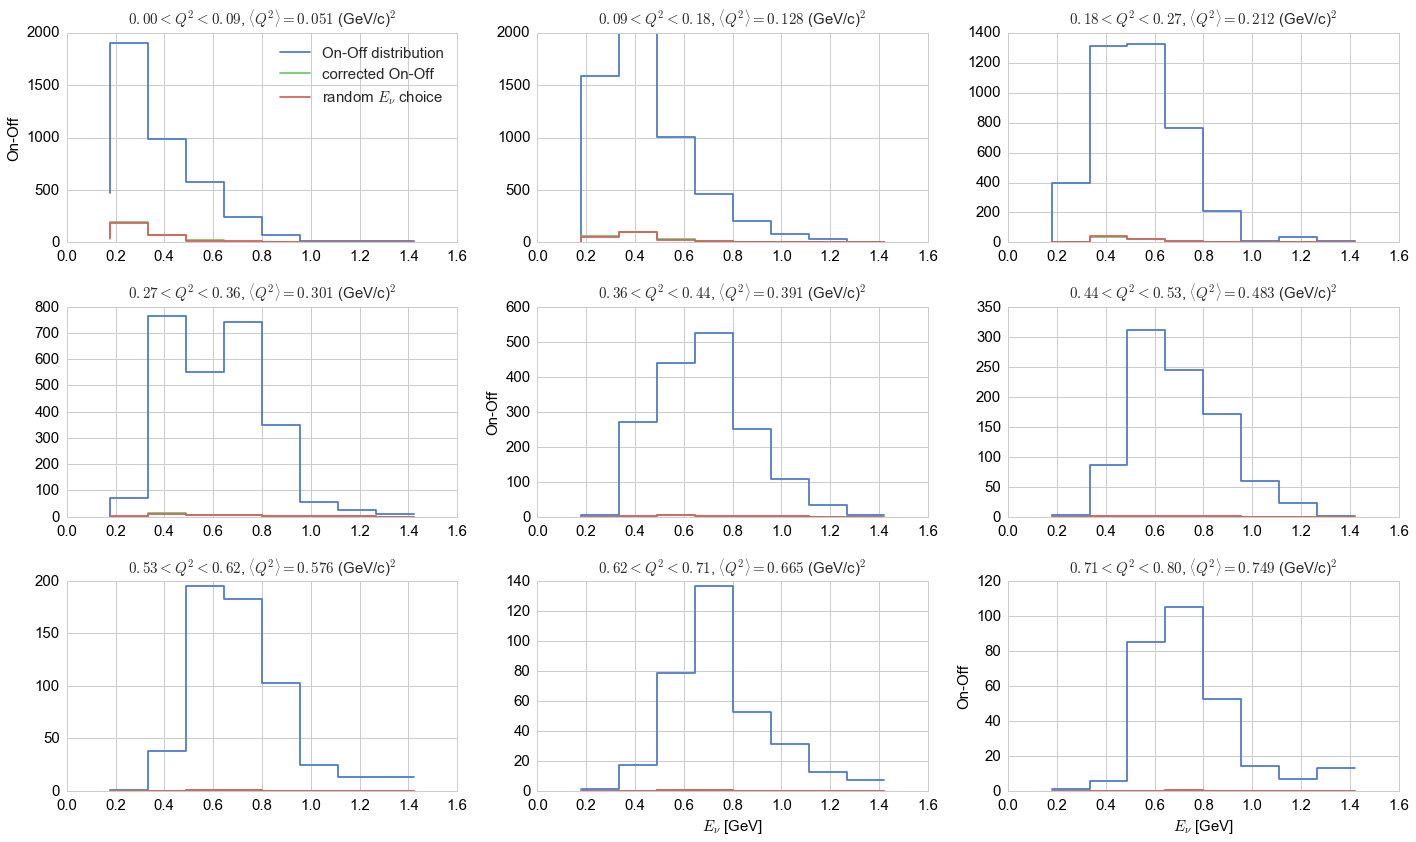

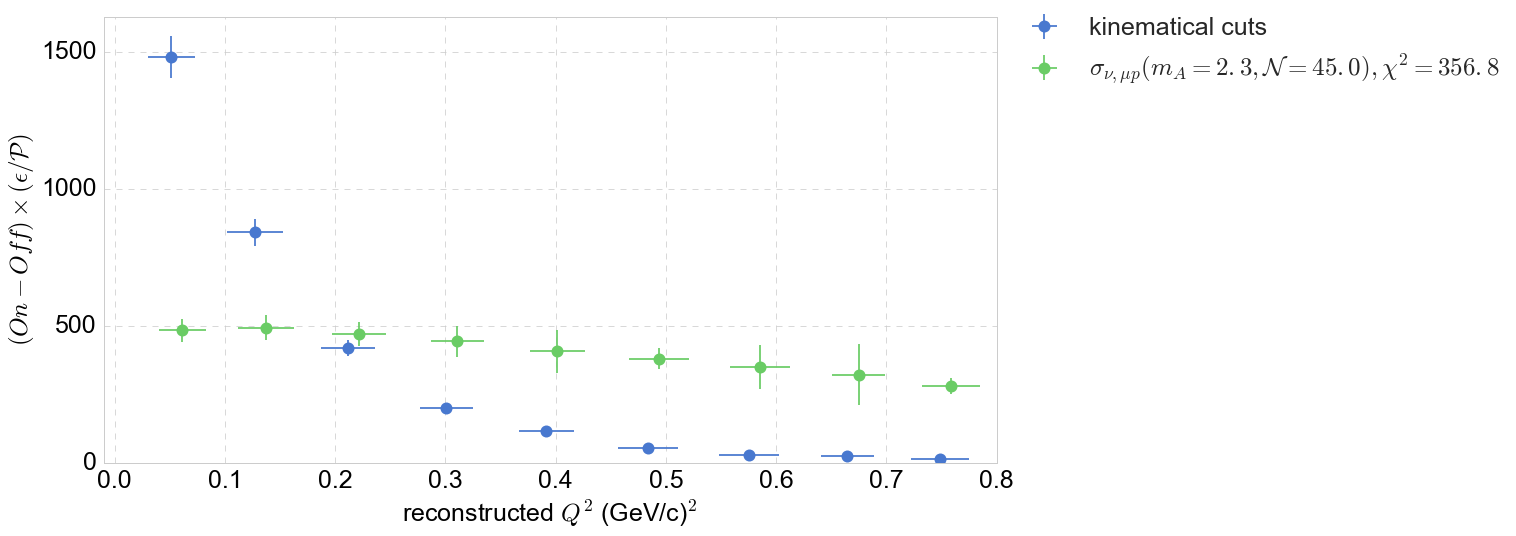

In [254]:
fit_Q2_points( mA = 2.3
              ,NormFact = 45 # normalization factor for the data
              ,cut_name='no cut' # the cut after which we take the On-Off data (and MC correction)
              ,N_rand_Ev = 100
              ,do_plot_Ev_distributions = True
              ,do_plot_Q2_points = True
             )

In [258]:
def fit_Q2_points_fixedEv( Ev=0.7
                          ,mA = 1.0
                          ,NormFact = 30 # normalization factor for the data
                          ,cut_name='vertex activity'
                          ,do_plot_Q2_points = True
                          ,debug=0
                          ):
    '''
    return: chi2 (Goodness Of Fit) for assuming Ev=700 MeV
    '''
    chi2 = 0

    Q2_averages = []
    Q2_stds = []
    N_meausred = []
    N_meausred_err = []
    N_Xsec_averages = []
    N_Xsec_stds = []


    for i,Q2bin in zip(range(len(Q2bins)-1),Q2bins):

        OnBeamSample = reduced_OnBeam[cut_name]
        OnBeamSample = OnBeamSample[(OnBeamSample['reco_Q2']>Q2bins[i]) & (OnBeamSample['reco_Q2']<Q2bins[i+1])]
        OffBeamSample = reduced_OffBeam[cut_name]
        OffBeamSample = OffBeamSample[(OffBeamSample['reco_Q2']>Q2bins[i]) & (OffBeamSample['reco_Q2']<Q2bins[i+1])]

        N_OnOff = len(OnBeamSample) - OffBeam_scaling*len(OffBeamSample)
        N_OnOff_err = np.sqrt(N_OnOff)
        N_OnOff_corrected = N_OnOff*pur_over_eff_mup[cut_name][i]
        N_OnOff_corrected_err = np.sqrt( np.square(N_OnOff_err*pur_over_eff_mup[cut_name][i])                           
                                        + np.square(N_OnOff*pur_over_eff_mup_err[cut_name][i]) )
        if N_OnOff<=1: 
            if debug: print 'N (on-off)<=0, omitting bin',i
            continue
        else:
            if debug: print 'N (on-off):',N_OnOff,'in bin',i

        smallQ2bins_in_Q2_bin = np.linspace(Q2bins[i],Q2bins[i+1],10)
        Q2binwidth = smallQ2bins_in_Q2_bin[1]-smallQ2bins_in_Q2_bin[0]


        # calculate the mean and std in the Q2 bin
        x, dx =  smallQ2bins_in_Q2_bin , Q2binwidth
        h_OnBeam,_ = np.histogram( OnBeamSample['reco_Q2'] , bins=smallQ2bins_in_Q2_bin )
        h_OffBeam,_ = np.histogram( OffBeamSample['reco_Q2'] , bins=smallQ2bins_in_Q2_bin )
        h_OnOff = h_OnBeam - OffBeam_scaling*h_OffBeam
        f_x = h_OnOff

        average_Q2_in_bin = (np.sum([x[j]*f_x[j]*dx for j in range(len(f_x))])
                             /np.sum([f_x[j]*dx for j in range(len(f_x))]))
        Q2_averages.append(average_Q2_in_bin)

        std_Q2_in_bin = np.sqrt((np.sum([(x[j]*x[j])*f_x[j]*dx for j in range(len(f_x))])
                             /np.sum([f_x[j]*dx for j in range(len(f_x))])) 
                             - np.square(average_Q2_in_bin))
        Q2_stds.append(std_Q2_in_bin)

        N_calculated = N_CCelasticXsec( Q2=average_Q2_in_bin, Ev=Ev, mA=mA , NormFact=NormFact)
        N_calculated_err = 0

        N_meausred.append(N_OnOff_corrected)
        N_meausred_err.append(N_OnOff_corrected_err)

        N_Xsec_averages.append(N_calculated)
        N_Xsec_stds.append(N_calculated_err)

        chi2_at_point = (np.square( N_calculated - N_OnOff_corrected )
                         /( np.square(N_calculated_err) + np.square(N_OnOff_corrected_err) ))
        chi2 += chi2_at_point
        if debug: print 'completed i',i,'out of ',(len(Q2bins)-1),'chi2 at point Q2',average_Q2_in_bin,'is ',chi2_at_point

        # -- - -- - end -- - -- - -- - plot the distribution as a function of reconstructed Ev
    Q2_averages = np.array(Q2_averages)
    Q2_stds = np.array(Q2_stds)
    N_Xsec_averages = np.array(N_Xsec_averages)
    N_Xsec_stds = np.array(N_Xsec_stds)

    if do_plot_Q2_points:
        fig,ax = plt.subplots(figsize=(16,8))
        plt.errorbar( x = Q2_averages+0.01*i_cut, xerr=Q2_stds, markersize=12
                         , y=N_meausred , yerr=N_meausred_err
                         , fmt='o', label=cut_label)
        plt.errorbar( x = Q2_averages, xerr=Q2_stds, markersize=12
                         , y = N_Xsec_averages , yerr=N_Xsec_stds
                         , fmt='o', label=r'$\sigma_{\nu,\mu p} (m_A=%.1f , \mathcal{N}=%.1f), \chi^2=%.1f$'%(mA,NormFact,chi2))

        ax.legend(bbox_to_anchor=(1,1.05),fontsize=25,loc=2)        
        set_axes(ax,r'reconstructed $Q^2$ (GeV/c)$^2$',r'$(On-Off) \times (\epsilon / \mathcal{P}) $'
                 ,xlim=(-0.01,0.8)
                 ,ylim=(-1,1.1*np.max([np.max(N_Xsec_averages),np.max(N_meausred)]))
                 ,do_add_grid=True)
    return chi2 , ax

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in sqrt


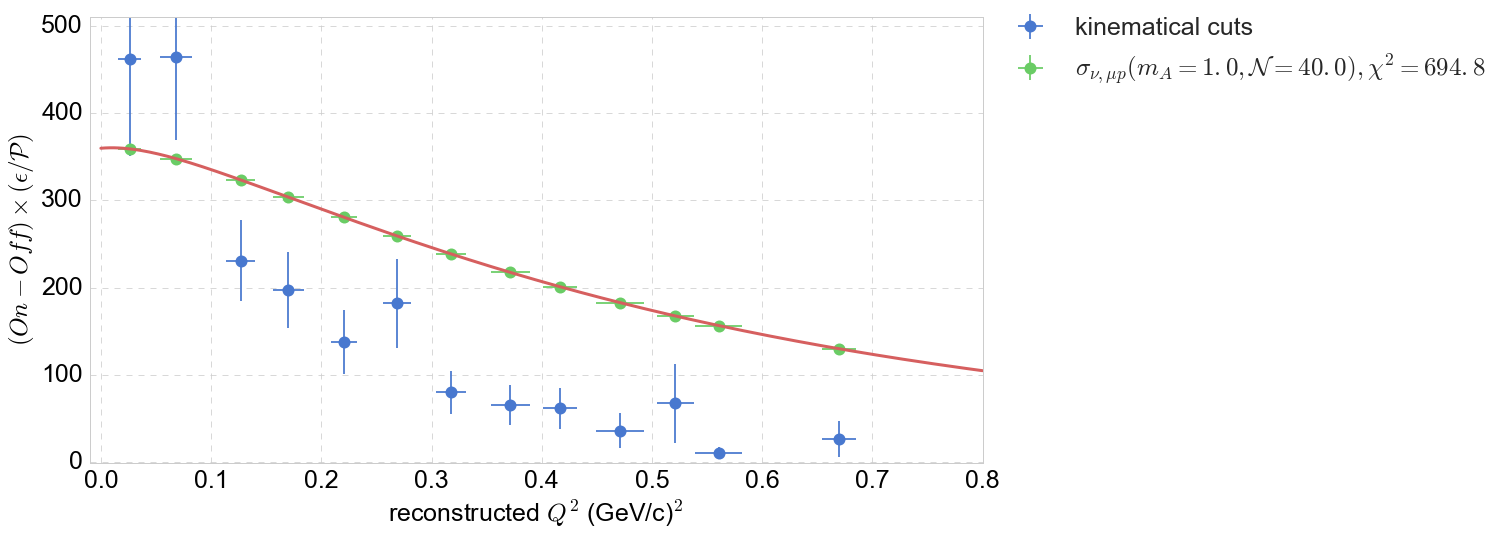

In [195]:
Ev=0.7
NormFact = 40
mA=1.0
chi2 , ax=fit_Q2_points_fixedEv( Ev=Ev
                      ,mA = mA
                      ,NormFact = NormFact # normalization factor for the data
                      ,cut_name='soft Pt' # the cut after which we take the On-Off data (and MC correction)
                      ,do_plot_Q2_points = True
                     )
Q2_vector = np.linspace( 0.0 , 0.8 , 200 )
ax.plot( Q2_vector , N_CCelasticXsec(Q2=Q2_vector,Ev=Ev,mA=mA , NormFact=NormFact ) , label='$m_A=%.2f$ GeV/c$^2$'%mA,linewidth=3)

In [145]:
mA_array = np.linspace(0.1,2,10)
NormFact_array = np.linspace(1,200,10)
chi2_array = np.ones((len(mA_array),len(NormFact_array)))

cut_name = 'no cut'
for i,mA in enumerate(mA_array):
    for j,NormFact in enumerate(NormFact_array):
        chi2 = fit_Q2_points( mA = mA
              ,NormFact = NormFact
              ,cut_name=cut_name
              ,N_rand_Ev=100
              ,do_plot_Ev_distributions = False
              ,do_plot_Q2_points = False
             )
        chi2_array[i][j] = chi2
        print 'i=',i,',mA=',mA,',j=',j,',NormFact=',NormFact,',chi2=',chi2_array[i][j]

i= 0 ,mA= 0.1 ,j= 0 ,NormFact= 1.0 ,chi2= 1059.59368733
i= 0 ,mA= 0.1 ,j= 1 ,NormFact= 23.1111111111 ,chi2= 674.570590612
i= 0 ,mA= 0.1 ,j= 2 ,NormFact= 45.2222222222 ,chi2= 535.232187316
i= 0 ,mA= 0.1 ,j= 3 ,NormFact= 67.3333333333 ,chi2= 501.593180257
i= 0 ,mA= 0.1 ,j= 4 ,NormFact= 89.4444444444 ,chi2= 410.102086229
i= 0 ,mA= 0.1 ,j= 5 ,NormFact= 111.555555556 ,chi2= 565.908326009
i= 0 ,mA= 0.1 ,j= 6 ,NormFact= 133.666666667 ,chi2= 1834.191496
i= 0 ,mA= 0.1 ,j= 7 ,NormFact= 155.777777778 ,chi2= 3193.78218403
i= 0 ,mA= 0.1 ,j= 8 ,NormFact= 177.888888889 ,chi2= 3630.29221992
i= 0 ,mA= 0.1 ,j= 9 ,NormFact= 200.0 ,chi2= 3385.1875292
i= 1 ,mA= 0.311111111111 ,j= 0 ,NormFact= 1.0 ,chi2= 1050.2599642
i= 1 ,mA= 0.311111111111 ,j= 1 ,NormFact= 23.1111111111 ,chi2= 583.863242202
i= 1 ,mA= 0.311111111111 ,j= 2 ,NormFact= 45.2222222222 ,chi2= 543.556571557
i= 1 ,mA= 0.311111111111 ,j= 3 ,NormFact= 67.3333333333 ,chi2= 482.593613355
i= 1 ,mA= 0.311111111111 ,j= 4 ,NormFact= 89.4444444444 ,chi2= 5

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text yticklabel objects>)

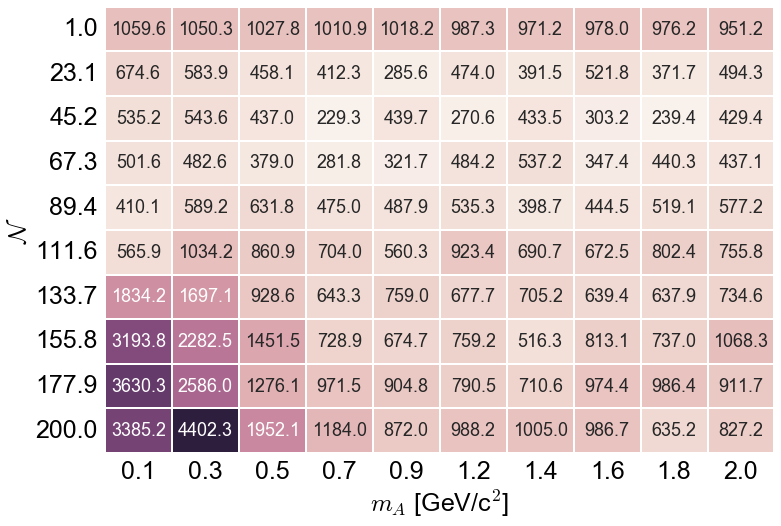

In [150]:
# plt.imshow(mA_array,NormFact_array,chi2_array)
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
fig,ax = plt.subplots(figsize=(12, 8))
heatmap = sns.heatmap(chi2_array.T
                      ,annot=True,fmt=".1f" 
                      ,xticklabels=['%.1f'%mA for mA in mA_array] ,yticklabels=['%.1f'%N for N in NormFact_array]
                      ,linewidths=1.,cbar=False)
set_axes(ax,r'$m_A$ [GeV/c$^2$]',r'$\mathcal{N}$')
ax.yticks(rotation=0) 

In [154]:
mA_array = np.linspace(0.1,2,50)
NormFact_array = np.linspace(1,200,60)
chi2_array = np.ones((len(mA_array),len(NormFact_array)))

cut_name = 'no cut'
for i,mA in enumerate(mA_array):
    for j,NormFact in enumerate(NormFact_array):
        chi2 = fit_Q2_points( mA = mA
              ,NormFact = NormFact
              ,cut_name=cut_name
              ,N_rand_Ev=200
              ,do_plot_Ev_distributions = False
              ,do_plot_Q2_points = False
             )
        chi2_array[i][j] = chi2
        print 'i=',i,',mA=',mA,',j=',j,',NormFact=',NormFact,',chi2=',chi2_array[i][j]

i= 0 ,mA= 0.1 ,j= 0 ,NormFact= 1.0 ,chi2= 1017.01450108
i= 0 ,mA= 0.1 ,j= 1 ,NormFact= 4.37288135593 ,chi2= 942.730378727
i= 0 ,mA= 0.1 ,j= 2 ,NormFact= 7.74576271186 ,chi2= 871.876416677
i= 0 ,mA= 0.1 ,j= 3 ,NormFact= 11.1186440678 ,chi2= 823.449021537
i= 0 ,mA= 0.1 ,j= 4 ,NormFact= 14.4915254237 ,chi2= 769.449133893
i= 0 ,mA= 0.1 ,j= 5 ,NormFact= 17.8644067797 ,chi2= 702.410775114
i= 0 ,mA= 0.1 ,j= 6 ,NormFact= 21.2372881356 ,chi2= 634.971512889
i= 0 ,mA= 0.1 ,j= 7 ,NormFact= 24.6101694915 ,chi2= 628.421006031
i= 0 ,mA= 0.1 ,j= 8 ,NormFact= 27.9830508475 ,chi2= 583.75131913
i= 0 ,mA= 0.1 ,j= 9 ,NormFact= 31.3559322034 ,chi2= 561.92528495
i= 0 ,mA= 0.1 ,j= 10 ,NormFact= 34.7288135593 ,chi2= 554.083738479
i= 0 ,mA= 0.1 ,j= 11 ,NormFact= 38.1016949153 ,chi2= 497.914921308
i= 0 ,mA= 0.1 ,j= 12 ,NormFact= 41.4745762712 ,chi2= 504.503961313
i= 0 ,mA= 0.1 ,j= 13 ,NormFact= 44.8474576271 ,chi2= 480.945508937
i= 0 ,mA= 0.1 ,j= 14 ,NormFact= 48.2203389831 ,chi2= 469.592820547
i= 0 ,mA= 0.1 ,j=

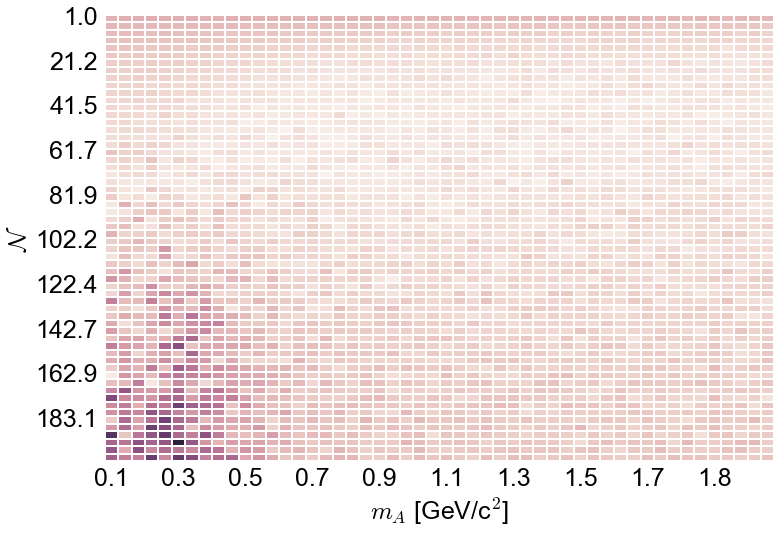

In [162]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
fig,ax = plt.subplots(figsize=(12, 8))

yticks = NormFact_array
yticks = ['%.1f'%y for y in yticks]
keptticks = yticks[::int(len(yticks)/10)]
yticks = ['' for y in yticks]
yticks[::int(len(yticks)/10)] = keptticks

xticks = mA_array
xticks = ['%.1f'%x for x in xticks]
keptticks = xticks[::int(len(xticks)/10)]
xticks = ['' for x in xticks]
xticks[::int(len(xticks)/10)] = keptticks

heatmap = sns.heatmap(chi2_array.T
                      ,xticklabels=xticks
                      ,yticklabels=yticks
                      ,linewidths=1.,cbar=False)
set_axes(ax,r'$m_A$ [GeV/c$^2$]',r'$\mathcal{N}$')
plt.yticks(rotation=0) ;

In [163]:
# after vertex activity cut
mA_array = np.linspace(0.1,2,50)
NormFact_array = np.linspace(1,200,60)
chi2_array = np.ones((len(mA_array),len(NormFact_array)))

cut_name = 'vertex activity'
for i,mA in enumerate(mA_array):
    for j,NormFact in enumerate(NormFact_array):
        chi2 = fit_Q2_points( mA = mA
              ,NormFact = NormFact
              ,cut_name=cut_name
              ,N_rand_Ev=200
              ,do_plot_Ev_distributions = False
              ,do_plot_Q2_points = False
             )
        chi2_array[i][j] = chi2
        print 'i=',i,',mA=',mA,',j=',j,',NormFact=',NormFact,',chi2=',chi2_array[i][j]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in sqrt


i= 0 ,mA= 0.1 ,j= 0 ,NormFact= 1.0 ,chi2= 262.72193828
i= 0 ,mA= 0.1 ,j= 1 ,NormFact= 4.37288135593 ,chi2= 217.341300675
i= 0 ,mA= 0.1 ,j= 2 ,NormFact= 7.74576271186 ,chi2= 187.317077845
i= 0 ,mA= 0.1 ,j= 3 ,NormFact= 11.1186440678 ,chi2= 162.515475672
i= 0 ,mA= 0.1 ,j= 4 ,NormFact= 14.4915254237 ,chi2= 146.259866331
i= 0 ,mA= 0.1 ,j= 5 ,NormFact= 17.8644067797 ,chi2= 120.088874682
i= 0 ,mA= 0.1 ,j= 6 ,NormFact= 21.2372881356 ,chi2= 101.450555287
i= 0 ,mA= 0.1 ,j= 7 ,NormFact= 24.6101694915 ,chi2= 95.5938158644
i= 0 ,mA= 0.1 ,j= 8 ,NormFact= 27.9830508475 ,chi2= 82.3871815214
i= 0 ,mA= 0.1 ,j= 9 ,NormFact= 31.3559322034 ,chi2= 72.6814027524
i= 0 ,mA= 0.1 ,j= 10 ,NormFact= 34.7288135593 ,chi2= 62.7493053492
i= 0 ,mA= 0.1 ,j= 11 ,NormFact= 38.1016949153 ,chi2= 52.6298898315
i= 0 ,mA= 0.1 ,j= 12 ,NormFact= 41.4745762712 ,chi2= 43.4698715845
i= 0 ,mA= 0.1 ,j= 13 ,NormFact= 44.8474576271 ,chi2= 40.9931492892
i= 0 ,mA= 0.1 ,j= 14 ,NormFact= 48.2203389831 ,chi2= 32.3865792007
i= 0 ,mA= 0.1 ,j

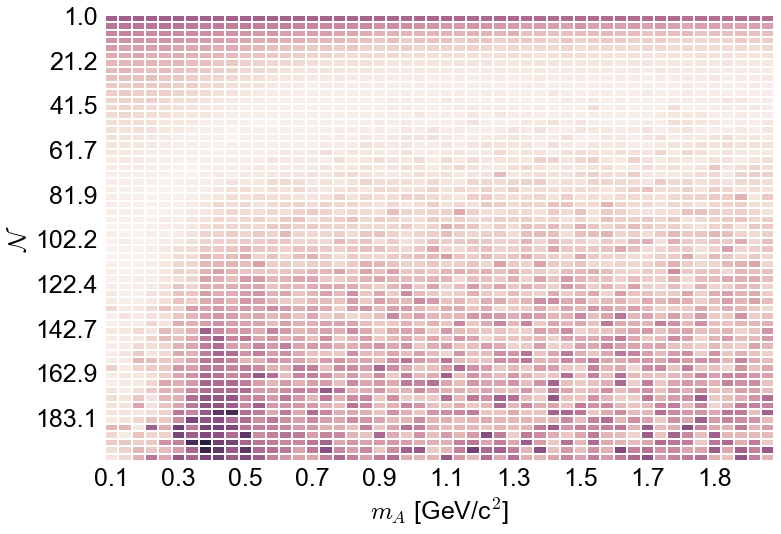

In [164]:
fig,ax = plt.subplots(figsize=(12, 8))

yticks = NormFact_array
yticks = ['%.1f'%y for y in yticks]
keptticks = yticks[::int(len(yticks)/10)]
yticks = ['' for y in yticks]
yticks[::int(len(yticks)/10)] = keptticks

xticks = mA_array
xticks = ['%.1f'%x for x in xticks]
keptticks = xticks[::int(len(xticks)/10)]
xticks = ['' for x in xticks]
xticks[::int(len(xticks)/10)] = keptticks

heatmap = sns.heatmap(chi2_array.T
                      ,xticklabels=xticks
                      ,yticklabels=yticks
                      ,linewidths=1.,cbar=False)
set_axes(ax,r'$m_A$ [GeV/c$^2$]',r'$\mathcal{N}$')
plt.yticks(rotation=0) ;

# $N(\mu-p)$ vs. N(calculation) in the MC
once with truth-$E_\nu$ for each event,
once with reco-$E_\nu$ for each event,
and once with the distribution of each $Q^2$

In [355]:
def CCelasticXsec4MC( pair_type='1mu-1p',cut_name='no cut'
                     ,mA = 1.0,NormFact = 30 # normalization factor for the data                                          
                     ,do_plot_Q2_points = True
                     ,debug=0 , ax=None                    
                    ):
    '''
    return: chi2 (Goodness Of Fit) for pair_type in MC data
    '''
    chi2 = 0
    chi2_truth_Q2 = 0
    for i_type,fpair_type in enumerate(pair_types):
        if fpair_type==pair_type: pair_label=MClabels[i_type]

    Q2_averages,Q2_stds = [],[]
    truth_Q2_averages,truth_Q2_stds = [],[]

    N_sim,N_sim_err = [],[]
    N_sim_truth_Q2,N_sim_truth_Q2_err = [],[]
    N_Xsec,N_Xsec_err = [],[] # exact calculation using the reconsutrcted Ev
    N_Xsec_truth_Ev_truth_Q2,N_Xsec_truth_Ev_truth_Q2_err = [],[] # exact calculation using the truth Ev
    N_Xsec_rand_Ev,N_Xsec_rand_Ev_err = [],[] # random Ev selection from the distribution


    for i,Q2bin in zip(range(len(Q2bins)-1),Q2bins):

        MCSample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]
        MC_in_Q2_bin = MCSample[(MCSample['reco_Q2']>Q2bins[i]) & (MCSample['reco_Q2']<Q2bins[i+1])]
        MC_in_truth_Q2_bin = MCSample[(MCSample['truth_Q2']>Q2bins[i]) & (MCSample['truth_Q2']<Q2bins[i+1])]
        
        if len(MC_in_Q2_bin)<=1: 
            if debug: print 'N (',pair_type,')<=1, omitting bin',i
            continue
        else: 
            if debug: print 'N (',pair_type,'):',N_OnOff,'in bin',i

        # calculate the mean and std in the Q2 bin       
        Q2_averages.append( np.mean(MC_in_Q2_bin['reco_Q2']) )
        Q2_stds.append( np.std(MC_in_Q2_bin['reco_Q2']) )
        truth_Q2_averages.append( np.mean(MC_in_truth_Q2_bin['truth_Q2']) )
        truth_Q2_stds.append( np.std(MC_in_truth_Q2_bin['truth_Q2']) )

        N_sim.append( len(MC_in_Q2_bin) )
        N_sim_err.append( np.sqrt(len(MC_in_Q2_bin)) )
        
        N_sim_truth_Q2.append( len(MC_in_truth_Q2_bin) )
        N_sim_truth_Q2_err.append( np.sqrt(len(MC_in_truth_Q2_bin)) )

        
        # calculate the expected number of events from cross-section
        Q2_asfloat = np.array(MC_in_Q2_bin['reco_Q2'])
        truth_Q2_asfloat = np.array(MC_in_truth_Q2_bin['truth_Q2'])
        Ev_asfloat = np.array(MC_in_Q2_bin['reco_Ev'])
        truth_Ev_asfloat = np.array(MC_in_truth_Q2_bin['truth_Ev'])

        N_from_Xsec = N_CCelasticXsec( Q2=Q2_asfloat, Ev=Ev_asfloat, mA=mA , NormFact=NormFact)
        N_Xsec.append(np.average(N_from_Xsec))
        N_Xsec_err.append(np.std(N_from_Xsec))
        chi2_at_point = (np.square( N_sim[-1] - N_Xsec[-1] )
                         /( np.square(N_sim_err[-1]) + np.square(N_Xsec_err[-1]) ))
        chi2 += chi2_at_point

        
#         N_from_Xsec_truth_Ev = N_CCelasticXsec( Q2=Q2_asfloat, Ev=truth_Ev_asfloat, mA=mA , NormFact=NormFact)
#         N_Xsec_truth_Ev.append(np.average(N_from_Xsec_truth_Ev))
#         N_Xsec_truth_Ev_err.append(np.std(N_from_Xsec_truth_Ev))

        N_from_Xsec_truth_Ev_truth_Q2 = N_CCelasticXsec( Q2=truth_Q2_asfloat, Ev=truth_Ev_asfloat, mA=mA , NormFact=NormFact)
        N_Xsec_truth_Ev_truth_Q2.append(np.average(N_from_Xsec_truth_Ev_truth_Q2))
        N_Xsec_truth_Ev_truth_Q2_err.append(np.std(N_from_Xsec_truth_Ev_truth_Q2))


        chi2_at_point = (np.square( N_sim_truth_Q2[-1] - N_Xsec_truth_Ev_truth_Q2[-1] )
                         /( np.square(N_sim_truth_Q2_err[-1]) + np.square(N_Xsec_truth_Ev_truth_Q2_err[-1]) ))
        chi2_truth_Q2 += chi2_at_point
        if debug: print 'completed i',i,'out of ',(len(Q2bins)-1),'chi2 at point Q2',average_Q2_in_bin,'is ',chi2_at_point

        # -- - -- - end -- - -- - -- - plot the distribution as a function of reconstructed Ev
    Q2_averages, Q2_stds = np.array(Q2_averages), np.array(Q2_stds)
    N_sim , N_sim_err = np.array(N_sim), np.array(N_sim_err)
    N_Xsec , N_Xsec_err = np.array(N_Xsec), np.array(N_Xsec_err)

    if do_plot_Q2_points:
        if ax is None: fig,ax = plt.subplots(figsize=(16,8))
        plt.errorbar( x = truth_Q2_averages, xerr=truth_Q2_stds, markersize=12                     
                     , y=N_sim_truth_Q2 , yerr=N_sim_truth_Q2_err                     
                     , fmt='o', label=r'$N_{MC}(Q^2_{gen.})$(cut: %s)%s'%(cut_name,pair_label)) 

        plt.errorbar( x = truth_Q2_averages, xerr=truth_Q2_stds, markersize=12                     
                     , y = N_Xsec_truth_Ev_truth_Q2 , yerr=N_Xsec_truth_Ev_truth_Q2_err                     
                     , fmt='o'
                     ,label='$%.1f\\times\\sigma_{\\nu,\\mu p}(Q^2_{gen.},E^\\nu_{gen.},m_A=%.1f$ GeV/c$^2$),$\\chi^2=%.1f$'%(NormFact,mA,chi2_truth_Q2)
                    )
        
        plt.errorbar( x = Q2_averages, xerr=Q2_stds, markersize=12                      
                     , y=N_sim , yerr=N_sim_err                     
                     , fmt='o', label=r'$N_{MC}(Q^2_{rec.})$(cut: %s)%s'%(cut_name,pair_label))                

        plt.errorbar( x = Q2_averages, xerr=Q2_stds, markersize=12                     
                     , y = N_Xsec , yerr=N_Xsec_err                     
                     , fmt='o'
                     ,label='$%.1f\\times\\sigma_{\\nu,\\mu p}(Q^2_{rec.},E^\\nu_{rec.},m_A=%.1f$ GeV/c$^2$),$\\chi^2=%.1f$'%(NormFact,mA,chi2)
                    )

        ax.legend(bbox_to_anchor=(1,1.05),fontsize=25,loc=2)        
        set_axes(ax,r'$Q^2$ (GeV/c)$^2$'
                 ,r'$N_{MC}$(cut: %s)%s'%(cut_name,pair_label)
                 ,xlim=(-0.01,0.8)
#                  ,ylim=(-1,1.1*np.max([np.max(N_Xsec_averages),np.max(N_meausred)]))
                 ,do_add_grid=True)
    return chi2 , ax

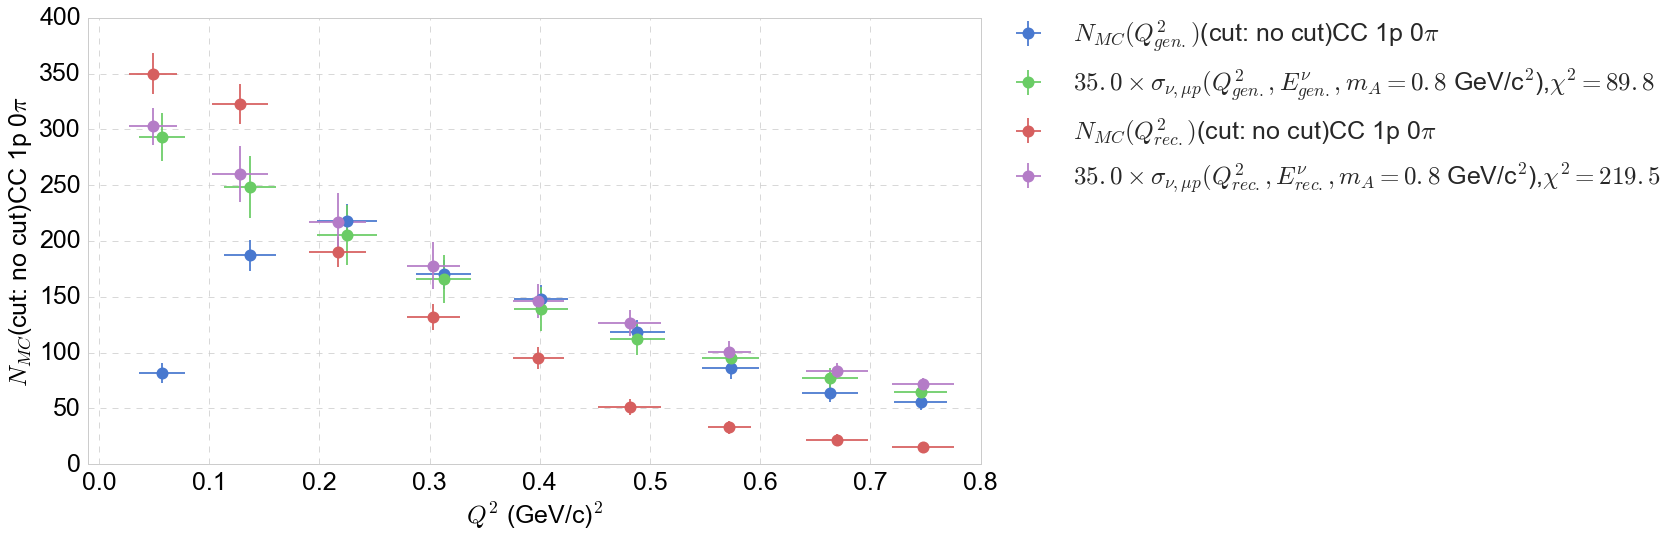

In [356]:
fig,ax = plt.subplots(figsize=(16,8))
pair_type = 'CC 1p 0pi'#'1mu-1p'
cut_name = 'no cut'
NormFact = 35
mA = 0.8
# h_MC,_ = np.histogram( reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]['reco_Q2'] , bins=Q2bins )
# plt.errorbar( x = Q2_centres+0.01*i_cut, xerr=0, markersize=12
#                  , y=h_MC , yerr=np.sqrt(h_MC)
#                  , fmt='o')
CCelasticXsec4MC( pair_type=pair_type,cut_name=cut_name
                 ,mA = mA,NormFact = NormFact ,do_plot_Q2_points = True
                 ,debug=0,ax=ax)
ax.legend(bbox_to_anchor=(1,1.05),fontsize=25,loc=2)        
# set_axes(ax,r'reconstructed $Q^2$ (GeV/c)$^2$',r'$N('+pair_type+')$ (MC)'
#          ,xlim=(-0.01,0.8))

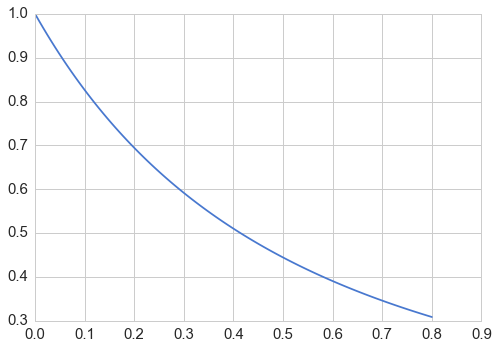

In [354]:
x = np.linspace(0,0.8,100)
y = G_A_dipole(Q2=x,mA=1)
plt.plot(x,y)